INF8770 Technologies multimédias

Polytechnique Montréal

Exemple du calcul de la corrélation croisée

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

Soit les trois vecteurs suivants:

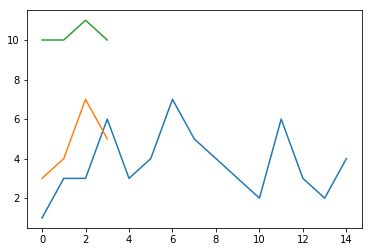

In [2]:
A = [1,3,3,6,3,4,7,5,4,3,2,6,3,2,4]
B = [3,4,7,5]
C = [10,10,11,10]

plt.plot(range(len(A)), A)
plt.plot(range(len(B)), B)
plt.plot(range(len(C)), C)
plt.show()

On voit que B est plus ressemblant à A que C. Un vecteur est semblable ou fait partie d'un autre vecteur si la corrélation est suffisamment grande. Corrélation entre A et B:

In [3]:
# On ajoute des 0 pour que les signaux soient de même taille. Ça facilite les caculs.
B = np.pad(B, (0, len(A)-len(B)), 'constant')
C = np.pad(C, (0, len(A)-len(C)), 'constant')
Rxy=[]
#Rxy Décalage de A vers la gauche, ou B vers la droite
for i in range(0,len(A)):
    Somme = 0;
    for j in range(0, len(A)-i):
        Somme += A[i+j] * B[j]
    Rxy += [Somme]
print(Rxy)
    
Ryx=[]
#Rxy Décalage de A vers la droite, ou B vers la gauche
for i in range(0,len(A)):
    Somme = 0;
    for j in range(0, len(A)-i):
        Somme += B[i+j] * A[j]
    Ryx += [Somme]
print(Ryx)

CorrCroisee = Ryx[::-1] +Rxy[1:] 
print(CorrCroisee)

[66, 78, 74, 93, 99, 95, 84, 62, 68, 74, 61, 64, 45, 22, 12]
[66, 40, 22, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 22, 40, 66, 78, 74, 93, 99, 95, 84, 62, 68, 74, 61, 64, 45, 22, 12]


Affichage du résultat de la correlation entre A et B

Le meilleur alignement est: 4


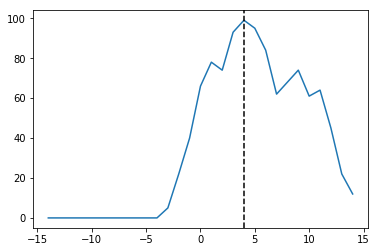

In [4]:
plt.plot(range(-len(A)+1,len(A)), CorrCroisee)
Decalage = CorrCroisee.index(max(CorrCroisee))-len(A)+1
print('Le meilleur alignement est:', Decalage)
plt.axvline(Decalage, color='k', ls='--')
plt.show()

Vérifions maintenant la correlation croisée entre A et C avec la fonction correlate de numpy.

In [5]:
CorrCroisee2 = np.correlate(A, C, "full")
print(CorrCroisee2)

[  0   0   0   0   0   0   0   0   0   0   0  10  41  73 133 156 163 204
 197 205 194 143 152 146 133 152  94  60  40]


Affichage du résultat de la correlation. Notez que la meilleure correlation entre A et B donne 99, alors que le résultat est 205 entre A et C. Ce résulat est causé par les amplitudes différentes des signaux B et C. Un signal de plus grande amplitude aura nécessairement une meilleure corrélation.

Le meilleur alignement est: 5


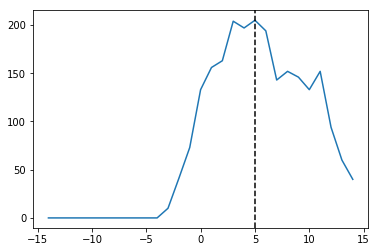

In [6]:
plt.plot(range(-len(A)+1,len(A)), CorrCroisee2)
Decalage2 = np.argmax(CorrCroisee2)-len(C)+1
print('Le meilleur alignement est:', Decalage2)
plt.axvline(Decalage2, color='k', ls='--')
plt.show()

Voici le résultat de l'alignement des signaux pour maximiser leur corrélation. L'alignement entre A et B et parfait. Ce n'est pas le cas pour C.

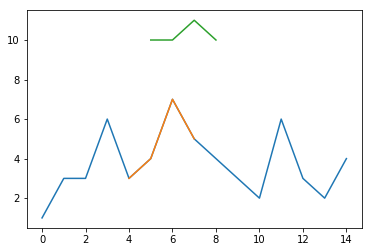

In [7]:
plt.plot(range(len(A)), A)
B = B[:4]
C = C[:4]
plt.plot(range(Decalage, Decalage+len(B)), B)
plt.plot(range(Decalage2, Decalage2+len(C)), C)
plt.show()

Maintenant, un exemple d'application pour rechercher un extrait audio. On normalize les signaux pour obtenir des résultats indépendant de l'amplitude. Lecture d'un fichier wav d'une personne disant zéro, un, deux, cinq.

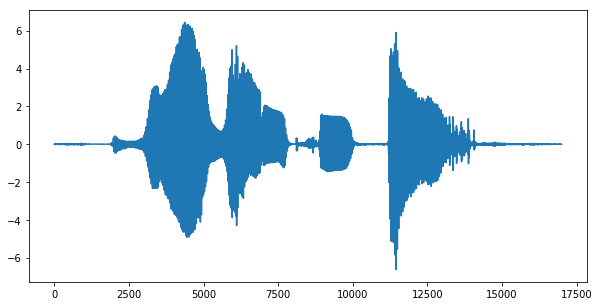

In [8]:
[fs1, signal1] = wavfile.read('0125.wav')
moy = np.mean(signal1)
ecart = np.std(signal1)
signal1 = (signal1 - moy)/ecart #normalisation.
plt.figure(figsize = (10,5))
plt.plot(range(len(signal1)), signal1)
plt.show()

Une personne disant zéro.

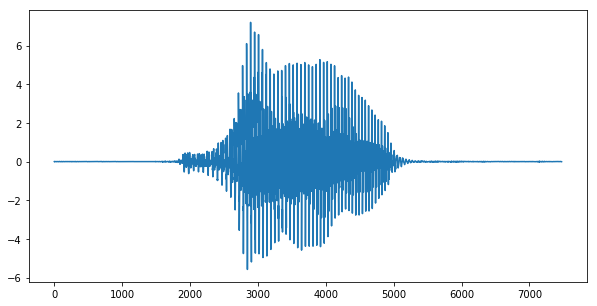

In [9]:
[fs2, signal2] = wavfile.read('0.wav')
moy = np.mean(signal2)
ecart = np.std(signal2)
signal2 = (signal2 - moy)/ecart
plt.figure(figsize = (10,5))
plt.plot(range(len(signal2)), signal2)
plt.show()

Est-ce que 0 est inclut dans 0125, et à quel endroit. Pour l'inclusion, il faudrait établir un seuil de correlation minimum. Dans ce cas-ci, on cherche seulement à localiser le 0.

In [10]:
CorrCroisee3 = np.correlate(signal1, signal2, "full")
Decalage3 = np.argmax(CorrCroisee3)-len(signal2)+1
Maxcor = np.max(CorrCroisee3)
print('Le meilleur alignement est:', Decalage3, 'avec une correlation de: ', Maxcor)

Le meilleur alignement est: 625 avec une correlation de:  1554.0852650066836


Affichage de l'alignement trouvé.

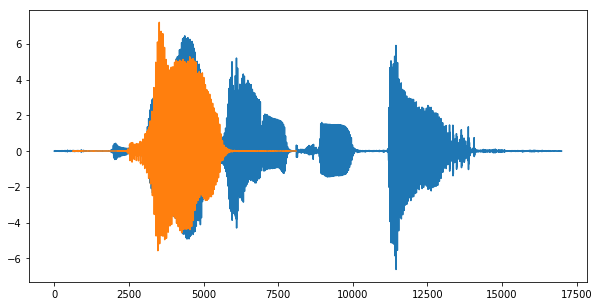

In [11]:
plt.figure(figsize = (10,5))
plt.plot(range(len(signal1)), signal1)
plt.plot(range(Decalage3, Decalage3+len(signal2)), signal2)
plt.show()